In [13]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import pandas

In [18]:
for i in range(2, 9):
    with open(f"isr_{i}_tasks.raw.txt") as f:
        data = list(map(lambda x: int(x), f.read().split()))
    data_diff = []
    for j in range(0, len(data) - 1, 2):
        data_diff.append(data[j + 1] - data[j])
    with open(f"isr_{i}_tasks.txt", "w+") as f:
        f.writelines(map(lambda x: str(x) + "\n", data_diff))

In [31]:
elData = dict()

for i in range(2, 9):
    with open(f"isr_{i}_tasks.txt") as f:
        data = list(map(lambda x: int(x), f.read().split()))
    elData[i] = sum(data) / len(data)

df = pandas.DataFrame()
df["numTasks"] = elData.keys()
df["avgExecTime"] = elData.values()
df

,numTasks,avgExecTime
0,2,48.0
1,3,64.0
2,4,76.0
3,5,92.0
4,6,172.0
5,7,184.0
6,8,200.0


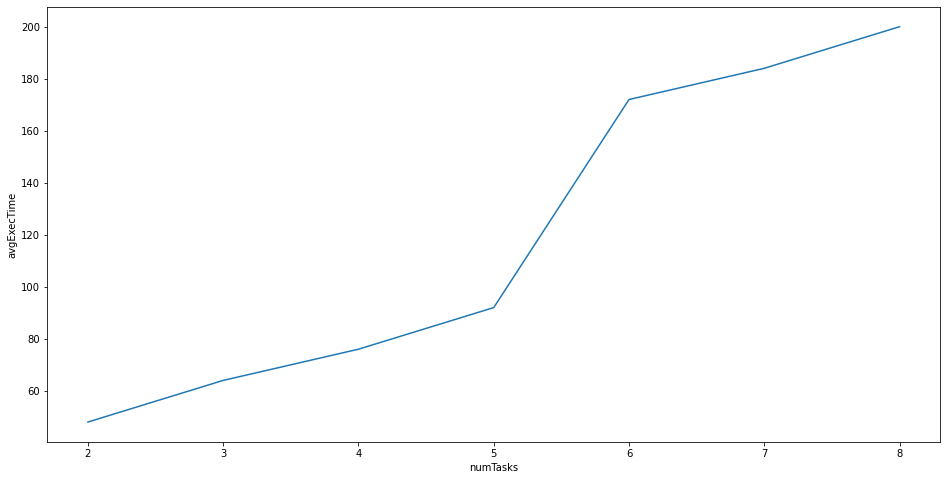

In [33]:
plt.figure(figsize=[16, 8]);
sb.lineplot(data=df, x="numTasks", y="avgExecTime", palette="deep");